In [1]:
import os
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import scipy 

from dekef.kernel_function import *
from dekef.base_density import *

# from IFlogdensity.contam_sm_de import *

import seaborn as sns
from IPython.display import Markdown as md

### Plot of sup-norm of IF of score matching log-density 

In [2]:
os.chdir('/Users/chenxizhou/Dropbox/code_package/IFlogdensity')
true_data = np.load('data/geyser.npy').astype(np.float64)
df = copy.deepcopy(true_data[:, 0]).reshape(-1, 1)

# original data with 108.0 removed 
data_waiting = df[df != 108.0]

In [ ]:
contam_data_list = np.arange(2., 410., 4).reshape(-1, 1)
bw_list = [5., 7., 9.]
log_pen_param_list = [-8., -10., -12.]
kernel_type = 'gaussian_poly2'
contam_weight = 0.01
xlimit = (1., 410.)
plot_pts_cnt = 3000

output_pd = pd.DataFrame()

for bw in bw_list: 
    for log_pen_param in log_pen_param_list: 
        
        sup_norm = {}
        
        sup_norm['bw'] = [bw] * len(contam_data_list)
        sup_norm['loglambda'] = [log_pen_param] * len(contam_data_list)
        sup_norm['contam_data'] = contam_data_list.flatten()
        sup_norm['IFsupnorm'] = []
        
        dir_name = (f'data/SM-bw={bw}-' + 
                    f'kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}-' + 
                    f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}')
        
#         dir_name = (f'/Users/chenxizhou/Desktop/data/SM-bw={bw}-' + 
#                     f'kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}-' + 
#                     f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}')
        
        for contam_data in contam_data_list: 
            
            sub_df = np.load(dir_name + f'/contam_data={contam_data}-IF-logden-newdata.npy')
            sup_norm['IFsupnorm'].append(np.max(np.abs(sub_df)))
                
        output_pd = pd.concat([output_pd, pd.DataFrame(sup_norm)])

output_pd

In [ ]:
# save the output data 
output_pd.to_csv(f'data/SM-IF-supnorm-contamweight={contam_weight}.csv')

In [ ]:
# contam_weight = 0.01
# output_pd = pd.read_csv(f'/data/SM-IF-supnorm-contamweight={contam_weight}.csv')
fig = plt.figure(constrained_layout=False)
fig.set_figheight(20)
fig.set_figwidth(20)
ncols = 3
nrows = 3

label_fontsize = 20
info_fontsize = 25
tick_fontsize = 18
linewidth = 3.0
x_label = 'additional observation'
y_label = 'IF sup norm'

spec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)

for i in range(nrows): 
    for j in range(ncols): 
        
        ax = fig.add_subplot(spec[i, j])
        bw, log_pen_param = bw_list[i], log_pen_param_list[j]
        
        subdf = output_pd[(output_pd.bw == bw_list[i]) & (output_pd.loglambda == log_pen_param_list[j])]
        ax.plot(subdf.contam_data, subdf.IFsupnorm, color = 'tab:red', linestyle = 'solid', linewidth = linewidth)
        sns.rugplot(pd.Series(data_waiting.flatten()), color = 'tab:blue')
        
        if i == nrows - 1: 
            ax.set_xlabel(x_label, fontsize = label_fontsize)
        else: 
            ax.set_xticks([])
        if j == 0: 
            ax.set_ylabel(y_label, fontsize = label_fontsize)
        
        ax.tick_params(axis = 'both', labelsize = tick_fontsize)

        info = r"$\sigma$={bw}, $\lambda$=exp({pen})".format(bw = bw_list[i], pen = log_pen_param_list[j])
        ax.text(0.975, 0.98,
                info,
                fontsize = info_fontsize,
                multialignment = 'left',
                horizontalalignment = 'right',
                verticalalignment = 'top',
                transform = ax.transAxes,
                bbox = {'facecolor': 'none',
                        'boxstyle': 'Round, pad=0.2'})

plt.tight_layout()
plt.savefig(f'plots/SM-geyser-waiting-logdensity-IF-supnorm-contamweight={contam_weight}.pdf')

### Plot of sup-norm of IF of maximum likelihood log-density 

In [ ]:
stepsize_pd = pd.DataFrame(
    {'bw': [5.0] * 3 + [7.0] * 3 + [9.0] * 3, 
     'logpen': [-8., -10., -12.] * 3, 
     'stepsize': [0.5, 1.0, 1.0, 0.4, 0.6, 0.6, 0.35, 0.4, 0.4]}
)
stepsize_pd

In [ ]:
contam_data_list = np.arange(2., 410., 4).reshape(-1, 1)
bw_list = [5., 7., 9.]
log_pen_param_list = [-8., -10., -12.]
kernel_type = 'gaussian_poly2'
contam_weight = 0.01
xlimit = (1., 410.)
plot_pts_cnt = 3000
seed = 0

output_pd = pd.DataFrame()

for bw in bw_list: 
    for log_pen_param in log_pen_param_list: 
        
        sup_norm = {}
        stepsize = stepsize_pd[(stepsize_pd.bw == bw) & (stepsize_pd.logpen == log_pen_param)].loc[:, 'stepsize'].item()
        
        sup_norm['bw'] = [bw] * len(contam_data_list)
        sup_norm['loglambda'] = [log_pen_param] * len(contam_data_list)
        sup_norm['contam_data'] = contam_data_list.flatten()
        sup_norm['IFsupnorm'] = []
        
        dir_name = (f'data/ML-basisn=205-bw={bw}-' + 
                    f'kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}-' + 
                    f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}-abstol=0.015-stepsize={stepsize}-seed={seed}')
        
        for contam_data in contam_data_list: 
            
            sub_df = np.load(dir_name + f'/contam_data={contam_data}-IF-logden-newdata.npy')
            sup_norm['IFsupnorm'].append(np.max(np.abs(sub_df)))
                
        output_pd = pd.concat([output_pd, pd.DataFrame(sup_norm)])

output_pd

In [ ]:
# save the output data 
output_pd.to_csv(f'data/ML-IF-supnorm-contamweight={contam_weight}.csv')

In [ ]:
# contam_weight = 0.01
# output_pd = pd.read_csv(f'/data/ML-IF-supnorm-contamweight={contam_weight}.csv')
fig = plt.figure(constrained_layout=False)
fig.set_figheight(20)
fig.set_figwidth(20)
ncols = 3
nrows = 3

label_fontsize = 20
info_fontsize = 25
tick_fontsize = 18
linewidth = 3.0
x_label = 'additional observation'
y_label = 'IF sup norm'

spec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)

for i in range(nrows): 
    for j in range(ncols): 
        
        ax = fig.add_subplot(spec[i, j])
        bw, log_pen_param = bw_list[i], log_pen_param_list[j]
        
        subdf = output_pd[(output_pd.bw == bw_list[i]) & (output_pd.loglambda == log_pen_param_list[j])]
        ax.plot(subdf.contam_data, subdf.IFsupnorm, color = 'tab:red', linestyle = 'solid', linewidth = linewidth)
        sns.rugplot(pd.Series(data_waiting.flatten()), color = 'tab:blue')
        
        if i == nrows - 1: 
            ax.set_xlabel(x_label, fontsize = label_fontsize)
        else: 
            ax.set_xticks([])
        if j == 0: 
            ax.set_ylabel(y_label, fontsize = label_fontsize)
        
        ax.tick_params(axis = 'both', labelsize = tick_fontsize)

        info = r"$\sigma$={bw}, $\lambda$=exp({pen})".format(bw = bw_list[i], pen = log_pen_param_list[j])
        ax.text(0.975, 0.98,
                info,
                fontsize = info_fontsize,
                multialignment = 'left',
                horizontalalignment = 'right',
                verticalalignment = 'top',
                transform = ax.transAxes,
                bbox = {'facecolor': 'none',
                        'boxstyle': 'Round, pad=0.2'})

plt.tight_layout()
plt.savefig(f'plots/ML-geyser-waiting-logdensity-IF-supnorm-contamweight={contam_weight}.pdf')

### Compute the norm of natural parameters

In [ ]:
os.chdir('/Users/chenxizhou/Dropbox/code_package/IFlogdensity')
true_data = np.load('data/geyser.npy').astype(np.float64)
df = copy.deepcopy(true_data[:, 0]).reshape(-1, 1)

# original data with 108.0 removed 
data_waiting = df[df != 108.0]

base_density = BasedenGamma(data_waiting)

In [ ]:
contam_data_list = np.arange(2., 410., 4).reshape(-1, 1)
grid_points_ml = np.arange(1., 411., 2).reshape(-1, 1)
r1 = 1.0 
r2 = 0.0 
c = 0.0
bw = 5.0
kernel_type = 'gaussian_poly2'
log_pen_param = -10.0
contam_weight = 0.01
plot_domain = (1., 410.)
plot_pts_cnt = 3000
sm_norm_list = []
ml_norm_list = []

sm_save_dir = (f'data/SM-bw={bw}-kernel={kernel_type}-loglambda={log_pen_param}-' + 
               f'contamweight={contam_weight}-plotdomain={plot_domain}-plotcnts={plot_pts_cnt}')
ml_save_dir = (f'data/ML-basisn={205}-bw={bw}-kernel={kernel_type}-loglambda={log_pen_param}-' + 
               f'contamweight={contam_weight}-plotdomain={plot_domain}-plotcnts={plot_pts_cnt}-abstol={0.015}-' +
               f'stepsize={1.0}-seed={0}')

for contam_data in contam_data_list: 
    
    if int(contam_data) // 50 == 0: 
        
        print(f'Current contam_data = {contam_data}.')
    
    # compute the ML norm 
    coef_ml = np.load(ml_save_dir + f'/contam_data={contam_data}-contam-coef.npy')
    if kernel_type == 'gaussian_poly2':

        kernel_function_grid_points_ml = GaussianPoly2(
            data=grid_points_ml,
            r1=r1,
            r2=r2,
            c=c,
            bw=bw)

    elif kernel_type == 'rationalquad_poly2':

        kernel_function_grid_points_ml = RationalQuadPoly2(
            data=grid_points_ml,
            r1=r1,
            r2=r2,
            c=c,
            bw=bw)

    gram_matrix_ml = kernel_function_grid_points_ml.kernel_gram_matrix(new_data=grid_points_ml)
    norm_ml = np.matmul(coef_ml.T, np.matmul(gram_matrix_ml, coef_ml)).item()
    
    ml_norm_list.append(np.sqrt(norm_ml))
    
    # compute SM norm 
    coef_sm = np.load(sm_save_dir + f'/contam_data={contam_data}-contam-coef.npy')
    
    cde_sm = ContamSMDensityEstimate(
        data=data_waiting,
        contam_data=contam_data.reshape(-1, 1),
        contam_weight=contam_weight,
        penalty_param=1.,
        base_density=base_density,
        r1=r1,
        r2=r2,
        c=c,
        bw=bw,
        kernel_type=kernel_type)
    K = cde_sm.matrix_K()
    
    norm_sm = np.matmul(coef_sm.T, np.matmul(K, coef_sm)).item()
    
    sm_norm_list.append(np.sqrt(norm_sm))


In [ ]:
# save the results 
output_norm_pd = pd.DataFrame(
    {'contam_data': contam_data_list.flatten(), 
     'ML_norm': ml_norm_list, 
     'SM_norm': sm_norm_list}
)
output_norm_pd

output_norm_pd.to_csv(f'data/ML-SM-natparam-norm-bw={bw}-logpen={log_pen_param}.csv')

In [ ]:
label_fontsize = 20
info_fontsize = 25
legend_fontsize = 20
tick_fontsize = 18
linewidth = 3.0
x_label = 'additional observation'
y_label = r'$\Vert \hat{f} \Vert_{\mathcal{H}}$'

plt.figure(figsize = (10, 10))
plt.plot(output_norm_pd.contam_data, output_norm_pd.ML_norm, color = 'tab:red', label = 'Maximum Likelihood', lw = linewidth)
plt.plot(output_norm_pd.contam_data, output_norm_pd.SM_norm, color = 'tab:blue', label = 'Score Matching', lw = linewidth)
plt.xlabel(x_label, fontsize = label_fontsize)
plt.ylabel(y_label, fontsize = label_fontsize)
plt.tick_params(axis = 'both', labelsize = tick_fontsize)
plt.legend(fontsize = legend_fontsize)

plt.savefig(f'plots/ML-SM-natparam-norm-bw={bw}-logpen={log_pen_param}.pdf')

plt.show()

In [ ]:
calism_save_dir = (f'data/CalibratedSM-basisn={205}-bw={bw}-kernel={kernel_type}-loglambda={log_pen_param}-' + 
                   f'contamweight={contam_weight}-plotdomain={plot_domain}-plotcnts={plot_pts_cnt}-' + 
                   f'abstol={0.015}-stepsize={1.0}-seed={0}')
ml_save_dir = (f'data/ML-basisn={205}-bw={bw}-kernel={kernel_type}-loglambda={log_pen_param}-' + 
               f'contamweight={contam_weight}-plotdomain={plot_domain}-plotcnts={plot_pts_cnt}-abstol={0.015}-' +
               f'stepsize={1.0}-seed={0}')

calism_norm_list = []
ml_norm_list = []

for contam_data in contam_data_list: 
    
    if int(contam_data) // 50 == 0: 
        
        print(f'Current contam_data = {contam_data}.')
    
    # compute the ML norm 
    coef_ml = np.load(ml_save_dir + f'/contam_data={contam_data}-contam-coef.npy')
    if kernel_type == 'gaussian_poly2':

        kernel_function_grid_points_ml = GaussianPoly2(
            data=grid_points_ml,
            r1=r1,
            r2=r2,
            c=c,
            bw=bw)

    elif kernel_type == 'rationalquad_poly2':

        kernel_function_grid_points_ml = RationalQuadPoly2(
            data=grid_points_ml,
            r1=r1,
            r2=r2,
            c=c,
            bw=bw)

    gram_matrix_ml = kernel_function_grid_points_ml.kernel_gram_matrix(new_data=grid_points_ml)
    norm_ml = np.matmul(coef_ml.T, np.matmul(gram_matrix_ml, coef_ml)).item()
    
    ml_norm_list.append(np.sqrt(norm_ml))
    
    # compute SM norm 
    coef_sm = np.load(calism_save_dir + f'/contam_data={contam_data}-contam-coef.npy')
    
    cde_sm = ContamSMDensityEstimate(
        data=data_waiting,
        contam_data=contam_data.reshape(-1, 1),
        contam_weight=contam_weight,
        penalty_param=1.,
        base_density=base_density,
        r1=r1,
        r2=r2,
        c=c,
        bw=bw,
        kernel_type=kernel_type)
    K = cde_sm.matrix_K()
    
    norm_sm = np.matmul(coef_sm.T, np.matmul(K, coef_sm)).item()
    
    calism_norm_list.append(np.sqrt(norm_sm))


In [ ]:
# save the results 
output_norm_pd1 = pd.DataFrame(
    {'contam_data': contam_data_list.flatten(), 
     'ML_norm': ml_norm_list, 
     'SM_norm': calism_norm_list}
)
output_norm_pd1

# output_norm_pd1.to_csv(f'data/ML-CalibratedSM-natparam-norm-bw={bw}-logpen={log_pen_param}.csv')

In [ ]:
label_fontsize = 20
info_fontsize = 25
tick_fontsize = 18
legend_fontsize = 20
linewidth = 3.0
x_label = 'additional observation'
y_label = r'$\Vert \hat{f} \Vert_{\mathcal{H}}$'

plt.figure(figsize = (10, 10))
plt.plot(output_norm_pd1.contam_data, output_norm_pd1.ML_norm, color = 'tab:red', label = 'Maximum Likelihood', lw = linewidth)
plt.plot(output_norm_pd1.contam_data, output_norm_pd1.SM_norm, color = 'tab:blue', label = 'Score Matching', lw = linewidth, ls = 'dashed')
plt.xlabel(x_label, fontsize = label_fontsize)
plt.ylabel(y_label, fontsize = label_fontsize)
plt.tick_params(axis = 'both', labelsize = tick_fontsize)
plt.legend(fontsize = legend_fontsize)
plt.savefig(f'plots/ML-CalibratedSM-natparam-norm-bw={bw}-logpen={log_pen_param}.pdf')

plt.show()

In [ ]:
r1 = 1.0 
r2 = 0.0 
c = 0.0
bw = 5.0
kernel_type = 'gaussian_poly2'
log_pen_param = -10.0
contam_weight = 0.01
plot_domain = (1., 410.)
plot_pts_cnt = 3000

contam_data_list = np.arange(2., 410., 4).reshape(-1, 1)

os.chdir('/Users/chenxizhou/Dropbox/code_package/IFlogdensity')
ml_save_dir = (f'data/ML-basisn={205}-bw={bw}-kernel={kernel_type}-loglambda={log_pen_param}-' + 
               f'contamweight={contam_weight}-plotdomain={plot_domain}-plotcnts={plot_pts_cnt}-abstol={0.015}-' +
               f'stepsize={1.0}-seed={0}')

grid_points_ml = np.arange(1., 411., 2).reshape(-1, 1)

kernel_function_grid_points_ml = GaussianPoly2(
    data=grid_points_ml,
    r1=r1,
    r2=r2,
    c=c,
    bw=bw)

gram_matrix_ml = kernel_function_grid_points_ml.kernel_gram_matrix(new_data=grid_points_ml)
coef_ml = np.load(ml_save_dir + f'/uncontam-coef.npy')
norm_ml = np.matmul(coef_ml.T, np.matmul(gram_matrix_ml, coef_ml)).item()

ml_norm_list = [np.sqrt(norm_ml)]

for contam_data in contam_data_list: 
    
    if int(contam_data) // 50 == 0: 
        
        print(f'Current contam_data = {contam_data}.')
    
    # compute the ML norm 
    coef_ml = np.load(ml_save_dir + f'/contam_data={contam_data}-contam-coef.npy')
    norm_ml = np.matmul(coef_ml.T, np.matmul(gram_matrix_ml, coef_ml)).item()
    
    ml_norm_list.append(np.sqrt(norm_ml))
    

### Constrained ML and Calibrated SM IF sup-norm 

In [10]:
stepsize_pd = pd.DataFrame(
    {'bw': [5.0] * 3 + [7.0] * 3 + [9.0] * 3, 
     'logpen': [-8., -10., -12.] * 3, 
     'stepsize': [0.6, 1.0, 1.0, 0.4, 0.6, 0.6, 0.3, 0.5, 0.5]}
)
stepsize_pd

,bw,logpen,stepsize
0,5.0,-8.0,0.6
1,5.0,-10.0,1.0
2,5.0,-12.0,1.0
3,7.0,-8.0,0.4
4,7.0,-10.0,0.6
5,7.0,-12.0,0.6
6,9.0,-8.0,0.3
7,9.0,-10.0,0.5
8,9.0,-12.0,0.5


In [15]:
# extract the supremum norm of the influence function of log-density 
contam_data_list = np.arange(2., 410., 4).reshape(-1, 1)
bw_list = [5., 7., 9.]
log_pen_param_list = [-8., -10., -12.]
kernel_type = 'gaussian_poly2'
contam_weight = 0.01
xlimit = (1., 410.)
plot_pts_cnt = 3000
seed = 0

output_pd = pd.DataFrame()

for bw in bw_list: 
    for log_pen_param in log_pen_param_list: 
        
        sup_norm = {}
        
        stepsize = stepsize_pd[(stepsize_pd.bw == bw) & (stepsize_pd.logpen == log_pen_param)].loc[:, 'stepsize'].item()
        
        sup_norm['bw'] = [bw] * len(contam_data_list)
        sup_norm['loglambda'] = [log_pen_param] * len(contam_data_list)
        sup_norm['contam_data'] = contam_data_list.flatten()
        sup_norm['IFsupnorm_ml'] = []
        sup_norm['IFsupnorm_sm'] = []
        
        if bw == 5. and log_pen_param == -12.: 
            abstol = 0.015
        
        else: 
            
            abstol = 0.05
            
        ml_dir_name = (f'data/ConstrainedML-basisn=205-bw={bw}-' + 
                       f'kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}-' + 
                       f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}-oriabstol={abstol}-oristepsize={stepsize}-' + 
                       f'seed={seed}-start_t_val=10000.0')
        sm_dir_name = (f'data/CalibratedSM-ConstrainedML-basisn=205-bw={bw}-' + 
                       f'kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}-' + 
                       f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}-oriabstol={abstol}-oristepsize={stepsize}-seed={seed}')
        
        for contam_data in contam_data_list: 
            
            sub_df_ml = np.load(ml_dir_name + f'/contam_data={contam_data}-IF-logden-newdata.npy')
            sup_norm['IFsupnorm_ml'].append(np.max(np.abs(sub_df_ml)))
            
            sub_df_sm = np.load(sm_dir_name + f'/contam_data={contam_data}-IF-logden-newdata.npy')
            sup_norm['IFsupnorm_sm'].append(np.max(np.abs(sub_df_sm)))
            
        output_pd = pd.concat([output_pd, pd.DataFrame(sup_norm)])

output_pd

,bw,loglambda,contam_data,IFsupnorm_ml,IFsupnorm_sm
0,5.0,-8.0,2.0,42.154567,100.763346
1,5.0,-8.0,6.0,49.554500,106.864697
2,5.0,-8.0,10.0,49.420785,88.867252
3,5.0,-8.0,14.0,49.243902,71.591853
4,5.0,-8.0,18.0,48.479613,58.575586
...,...,...,...,...,...
97,9.0,-12.0,390.0,109.082636,38.068269
98,9.0,-12.0,394.0,108.967324,37.997899
99,9.0,-12.0,398.0,120.299819,38.367693
100,9.0,-12.0,402.0,96.484515,38.296784


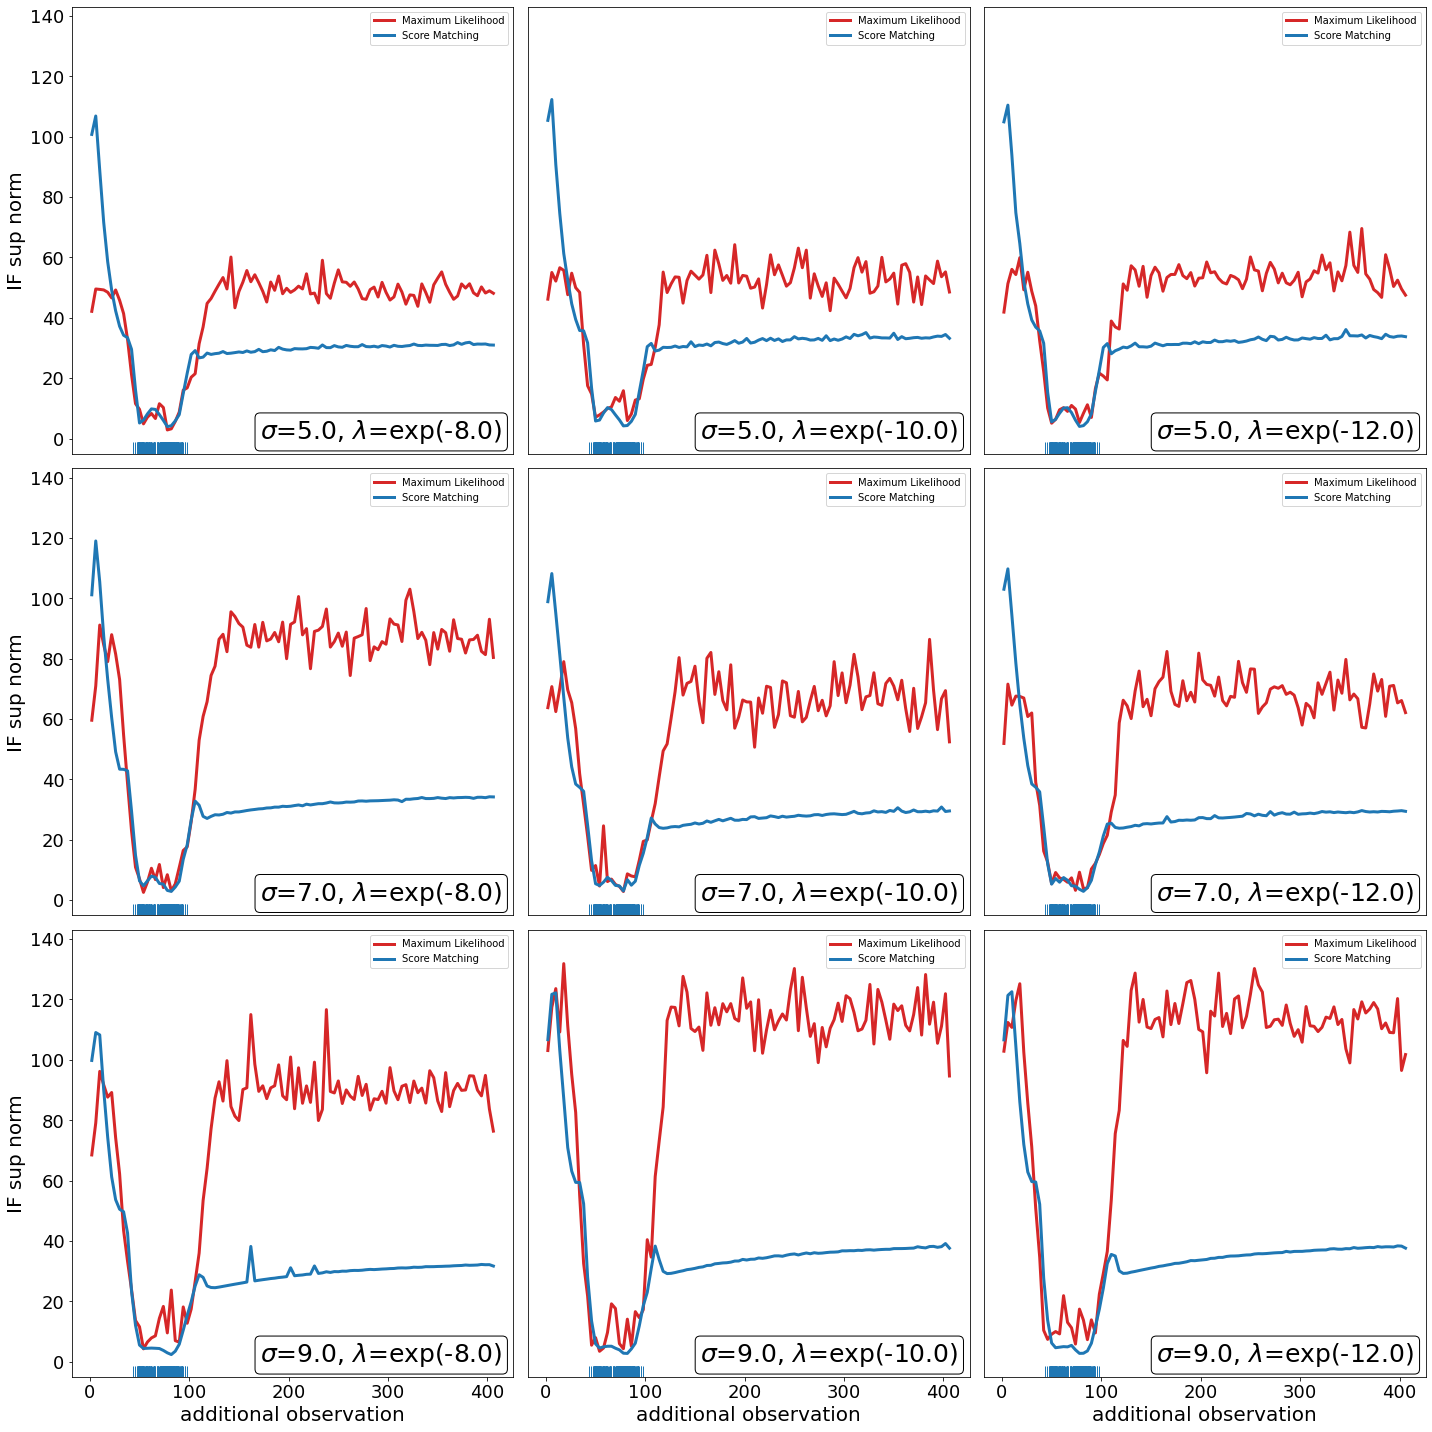

In [24]:
# contam_weight = 0.01
# output_pd = pd.read_csv(f'/data/ML-IF-supnorm-contamweight={contam_weight}.csv')
fig = plt.figure(constrained_layout=False)
fig.set_figheight(20)
fig.set_figwidth(20)
ncols = 3
nrows = 3

label_fontsize = 20
info_fontsize = 25
tick_fontsize = 18
linewidth = 3.0
x_label = 'additional observation'
y_label = 'IF sup norm'

spec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)

for i in range(nrows): 
    for j in range(ncols): 
        
        ax = fig.add_subplot(spec[i, j])
        bw, log_pen_param = bw_list[i], log_pen_param_list[j]
        
        subdf = output_pd[(output_pd.bw == bw_list[i]) & (output_pd.loglambda == log_pen_param_list[j])]
        ax.plot(subdf.contam_data, subdf.IFsupnorm_ml, 
                color = 'tab:red', linestyle = 'solid', linewidth = linewidth, label = 'Maximum Likelihood')
        ax.plot(subdf.contam_data, subdf.IFsupnorm_sm, 
                color = 'tab:blue', linestyle = 'solid', linewidth = linewidth, label = 'Score Matching')
        ax.legend()
        sns.rugplot(pd.Series(data_waiting.flatten()), color = 'tab:blue')
        ax.set_ylim((-5., 143.))
        if i == nrows - 1: 
            ax.set_xlabel(x_label, fontsize = label_fontsize)
        else: 
            ax.set_xticks([])
        if j == 0: 
            ax.set_ylabel(y_label, fontsize = label_fontsize)
        else: 
            ax.set_yticks([])
        
        ax.tick_params(axis = 'both', labelsize = tick_fontsize)

        info = r"$\sigma$={bw}, $\lambda$=exp({pen})".format(bw = bw_list[i], pen = log_pen_param_list[j])
        ax.text(0.975, 0.08,
                info,
                fontsize = info_fontsize,
                multialignment = 'left',
                horizontalalignment = 'right',
                verticalalignment = 'top',
                transform = ax.transAxes,
                bbox = {'facecolor': 'none',
                        'boxstyle': 'Round, pad=0.2'})

plt.tight_layout()
# plt.savefig(f'plots/ConstrainedML-CalibratedSM-geyser-waiting-logdensity-IF-supnorm-contamweight={contam_weight}.pdf')